In [2]:
import numpy as np

from scipy.integrate import quad

import particle

import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True

In [7]:
m_B = particle.literals.B_minus.mass
m_ell = particle.literals.e_minus.mass
m_mu = particle.literals.mu_minus.mass
m_tau = particle.literals.tau_minus.mass

fa = 1e6

In [3]:
BR_SM_Be = 8.37e-12
BR_exp_Be = 9.8e-7

BR_SM_Bmu = 3.57e-7
BR_exp_Bmu = (5.3+2+0.9)*1e-7

BR_SM_Btau = 7.95e-5
BR_exp_Btau = (7.2+2.7+1.1)*1e-5

$$\frac{\left(\text{MB}^2-t\right)^2 \sqrt{\text{ma}^4-2 \text{ma}^2 \left(\text{ml}^2+t\right)+\left(\text{ml}^2-t\right)^2} \left(16 \text{cl}^2 \text{ml}^2 \left(\left(\text{ml}^2-t\right)^2-\text{ma}^2 \left(\text{ml}^2+t\right)\right)+8 \text{cl} \text{cW} \text{ml}^2 \left(\text{ml}^2-t\right) \left(\text{ma}^2-\text{ml}^2+t\right)-\text{cW}^2 \left(\text{ml}^2-t\right)^2 \left(\text{ma}^2-\text{ml}^2-t\right)\right)}{32 t \left(\text{ml}^2-t\right)^2}$$

In [4]:
def dGamma(t: float, ma: float, ml: float, MB: float, gl: float, gW: float) -> float:
    return max(0,((1-t/MB**2)**2*(ma**4-2*ma**2*(t+ml**2)+(t-ml**2)**2)**0.5*(16*gl**2*((t-ml**2)**2-ma**2*(ml**2+t))-8*gl*gW*(t-ml**2)*(t-ml**2+ma**2)+gW**2/ml**2*(t-ml**2)**2*(t+ml**2-ma**2)))/(32*t*(t-ml**2)**2))

In [5]:
ma = 10**np.linspace(-1, 4, 200)

In [10]:
Gamma_Be_gl = np.array(list(map(lambda m: quad(lambda t: dGamma(t, m, m_ell, m_B, 1, 0), (m+m_ell)**2, m_B**2)[0], ma)))/(4*np.pi**2*m_ell**2*(1-m_ell**2/m_B**2)**2)

Gamma_Bmu_gl = np.array(list(map(lambda m: quad(lambda t: dGamma(t, m, m_mu, m_B, 1, 0), (m+m_mu)**2, m_B**2)[0], ma)))/(4*np.pi**2*m_mu**2*(1-m_mu**2/m_B**2)**2)

Gamma_Btau_gl = np.array(list(map(lambda m: quad(lambda t: dGamma(t, m, m_tau, m_B, 1, 0), (m+m_tau)**2, m_B**2)[0], ma)))/(4*np.pi**2*m_tau**2*(1-m_tau**2/m_B**2)**2)

/tmp/ipykernel_23253/798276934.py:2: RuntimeWarning: invalid value encountered in double_scalars
  return max(0,((1-t/MB**2)**2*(ma**4-2*ma**2*(t+ml**2)+(t-ml**2)**2)**0.5*(16*gl**2*((t-ml**2)**2-ma**2*(ml**2+t))-8*gl*gW*(t-ml**2)*(t-ml**2+ma**2)+gW**2/ml**2*(t-ml**2)**2*(t+ml**2-ma**2)))/(32*t*(t-ml**2)**2))


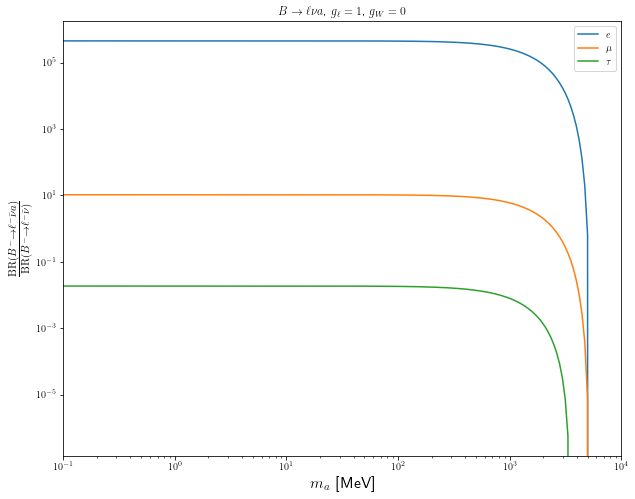

In [21]:
plt.figure(figsize=(10, 8))
plt.loglog(ma, Gamma_Be_gl, label=r"$e$")
plt.loglog(ma, Gamma_Bmu_gl, label=r"$\mu$")
plt.loglog(ma, Gamma_Btau_gl, label=r"$\tau$")
plt.xlim(0.1, 1e4)
plt.xlabel(r'$m_a$ [MeV]', fontsize=16)
plt.ylabel(r'$\frac{\mathrm{BR}(B^-\to \ell^- \bar{\nu}a)}{\mathrm{BR}(B^-\to \ell^- \bar{\nu})}$', fontsize=16)
plt.title(r'$B\to \ell \nu a$, $g_\ell = 1$, $g_W = 0$')
plt.legend()

In [11]:
Gamma_Be_gW = np.array(list(map(lambda m: quad(lambda t: dGamma(t, m, m_ell, m_B, 0, 1), (m+m_ell)**2, m_B**2)[0], ma)))/(4*np.pi**2*m_ell**2*(1-m_ell**2/m_B**2)**2)

Gamma_Bmu_gW = np.array(list(map(lambda m: quad(lambda t: dGamma(t, m, m_mu, m_B, 0, 1), (m+m_mu)**2, m_B**2)[0], ma)))/(4*np.pi**2*m_mu**2*(1-m_mu**2/m_B**2)**2)

Gamma_Btau_gW = np.array(list(map(lambda m: quad(lambda t: dGamma(t, m, m_tau, m_B, 0, 1), (m+m_tau)**2, m_B**2)[0], ma)))/(4*np.pi**2*m_tau**2*(1-m_tau**2/m_B**2)**2)

/tmp/ipykernel_23253/798276934.py:2: RuntimeWarning: invalid value encountered in double_scalars
  return max(0,((1-t/MB**2)**2*(ma**4-2*ma**2*(t+ml**2)+(t-ml**2)**2)**0.5*(16*gl**2*((t-ml**2)**2-ma**2*(ml**2+t))-8*gl*gW*(t-ml**2)*(t-ml**2+ma**2)+gW**2/ml**2*(t-ml**2)**2*(t+ml**2-ma**2)))/(32*t*(t-ml**2)**2))


In [8]:
Gamma_Be_gW_2 = np.array(list(map(lambda m: quad(lambda t: dGamma(t, m, m_ell, m_B, 1, 1), (m+m_ell)**2, m_B**2)[0], ma)))/(4*np.pi**2*m_ell**2*(1-m_ell**2/m_B**2)**2)

Gamma_Bmu_gW_2 = np.array(list(map(lambda m: quad(lambda t: dGamma(t, m, m_mu, m_B, 1, 1), (m+m_mu)**2, m_B**2)[0], ma)))/(4*np.pi**2*m_mu**2*(1-m_mu**2/m_B**2)**2)

Gamma_Btau_gW_2 = np.array(list(map(lambda m: quad(lambda t: dGamma(t, m, m_tau, m_B, 1, 1), (m+m_tau)**2, m_B**2)[0], ma)))/(4*np.pi**2*m_tau**2*(1-m_tau**2/m_B**2)**2)

/tmp/ipykernel_23253/798276934.py:2: RuntimeWarning: invalid value encountered in double_scalars
  return max(0,((1-t/MB**2)**2*(ma**4-2*ma**2*(t+ml**2)+(t-ml**2)**2)**0.5*(16*gl**2*((t-ml**2)**2-ma**2*(ml**2+t))-8*gl*gW*(t-ml**2)*(t-ml**2+ma**2)+gW**2/ml**2*(t-ml**2)**2*(t+ml**2-ma**2)))/(32*t*(t-ml**2)**2))


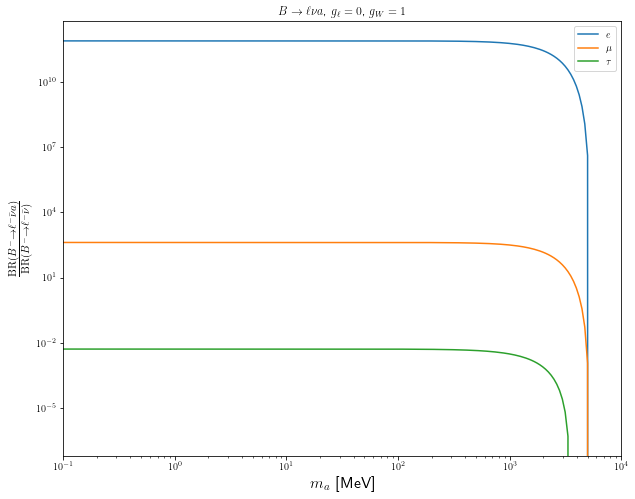

In [22]:
plt.figure(figsize=(10, 8))
plt.loglog(ma, Gamma_Be_gW, label=r"$e$")
plt.loglog(ma, Gamma_Bmu_gW, label=r"$\mu$")
plt.loglog(ma, Gamma_Btau_gW, label=r"$\tau$")
plt.xlabel(r'$m_a$ [MeV]', fontsize=16)
plt.xlim(0.1, 1e4)
plt.ylabel(r'$\frac{\mathrm{BR}(B^-\to \ell^- \bar{\nu}a)}{\mathrm{BR}(B^-\to \ell^- \bar{\nu})}$', fontsize=16)
plt.title(r'$B\to \ell \nu a$, $g_\ell = 0$, $g_W = 1$')
plt.legend()

In [12]:
bound_Be_gl = np.sqrt((BR_exp_Be/BR_SM_Be - 1)/Gamma_Be_gl)
bound_Bmu_gl = np.sqrt((BR_exp_Bmu/BR_SM_Bmu - 1)/Gamma_Bmu_gl)
bound_Btau_gl = np.sqrt((BR_exp_Btau/BR_SM_Btau - 1)/Gamma_Btau_gl)

bound_Be_gW = np.sqrt((BR_exp_Be/BR_SM_Be - 1)/Gamma_Be_gW)
bound_Bmu_gW = np.sqrt((BR_exp_Bmu/BR_SM_Bmu - 1)/Gamma_Bmu_gW)
bound_Btau_gW = np.sqrt((BR_exp_Btau/BR_SM_Btau - 1)/Gamma_Btau_gW)

bound_Be_gW_2= np.sqrt((BR_exp_Be/BR_SM_Be - 1)/Gamma_Be_gW_2)
bound_Bmu_gW_2 = np.sqrt((BR_exp_Bmu/BR_SM_Bmu - 1)/Gamma_Bmu_gW_2)
bound_Btau_gW_2 = np.sqrt((BR_exp_Btau/BR_SM_Btau - 1)/Gamma_Btau_gW_2)

/tmp/ipykernel_23253/2834630992.py:1: RuntimeWarning: divide by zero encountered in true_divide
  bound_Be_gl = np.sqrt((BR_exp_Be/BR_SM_Be - 1)/Gamma_Be_gl)
/tmp/ipykernel_23253/2834630992.py:1: RuntimeWarning: invalid value encountered in sqrt
  bound_Be_gl = np.sqrt((BR_exp_Be/BR_SM_Be - 1)/Gamma_Be_gl)
/tmp/ipykernel_23253/2834630992.py:2: RuntimeWarning: divide by zero encountered in true_divide
  bound_Bmu_gl = np.sqrt((BR_exp_Bmu/BR_SM_Bmu - 1)/Gamma_Bmu_gl)
/tmp/ipykernel_23253/2834630992.py:2: RuntimeWarning: invalid value encountered in sqrt
  bound_Bmu_gl = np.sqrt((BR_exp_Bmu/BR_SM_Bmu - 1)/Gamma_Bmu_gl)
/tmp/ipykernel_23253/2834630992.py:3: RuntimeWarning: divide by zero encountered in true_divide
  bound_Btau_gl = np.sqrt((BR_exp_Btau/BR_SM_Btau - 1)/Gamma_Btau_gl)
/tmp/ipykernel_23253/2834630992.py:3: RuntimeWarning: invalid value encountered in sqrt
  bound_Btau_gl = np.sqrt((BR_exp_Btau/BR_SM_Btau - 1)/Gamma_Btau_gl)
/tmp/ipykernel_23253/2834630992.py:5: RuntimeWarning

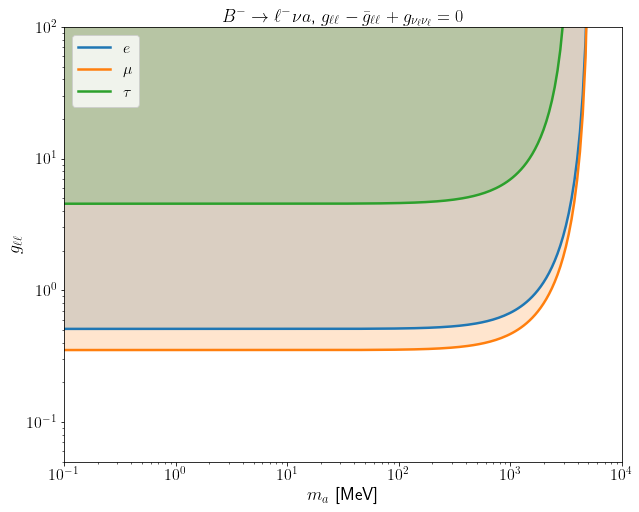

In [174]:
plt.figure(figsize=(10, 8))
plt.plot(ma, bound_Be_gl, label=r"$e$", lw=2.5)
plt.plot(ma, bound_Bmu_gl, label=r"$\mu$", lw=2.5)
plt.plot(ma, bound_Btau_gl, label=r"$\tau$", lw=2.5)
plt.fill_between(ma, bound_Be_gl, 1e2, alpha=0.2)
plt.fill_between(ma, bound_Bmu_gl, 1e2, alpha=0.2)
plt.fill_between(ma, bound_Btau_gl, 1e2, alpha=0.2)
ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')
plt.xlim(0.1, 1e4)
plt.ylim(0.05, 1e2)
plt.xlabel(r'$m_a$ [MeV]', fontsize=18)
plt.ylabel(r'$g_{\ell\ell}$', fontsize=18)
plt.title(r'$B^-\to \ell^- \nu a$,  $g_{\ell\ell} - \bar{g}_{\ell\ell} + g_{\nu_\ell\nu_\ell} = 0$', fontsize=18)
plt.legend(fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.savefig('limgl.png')

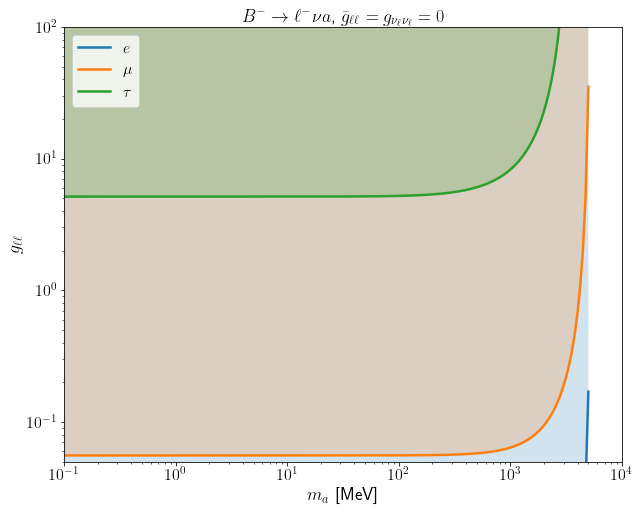

In [13]:
plt.figure(figsize=(10, 8))
plt.plot(ma, bound_Be_gW_2, label=r"$e$", lw=2.5)
plt.plot(ma, bound_Bmu_gW_2, label=r"$\mu$", lw=2.5)
plt.plot(ma, bound_Btau_gW_2, label=r"$\tau$", lw=2.5)
plt.fill_between(ma, bound_Be_gW_2, 1e2, alpha=0.2)
plt.fill_between(ma, bound_Bmu_gW_2, 1e2, alpha=0.2)
plt.fill_between(ma, bound_Btau_gW_2, 1e2, alpha=0.2)
ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')
plt.xlim(0.1, 1e4)
plt.ylim(0.05, 1e2)
plt.xlabel(r'$m_a$ [MeV]', fontsize=18)
plt.ylabel(r'$g_{\ell\ell}$', fontsize=18)
plt.title(r'$B^-\to \ell^- \nu a$,  $\bar{g}_{\ell\ell} = g_{\nu_\ell\nu_\ell} = 0$', fontsize=18)
plt.legend(fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.savefig('limgl.png')

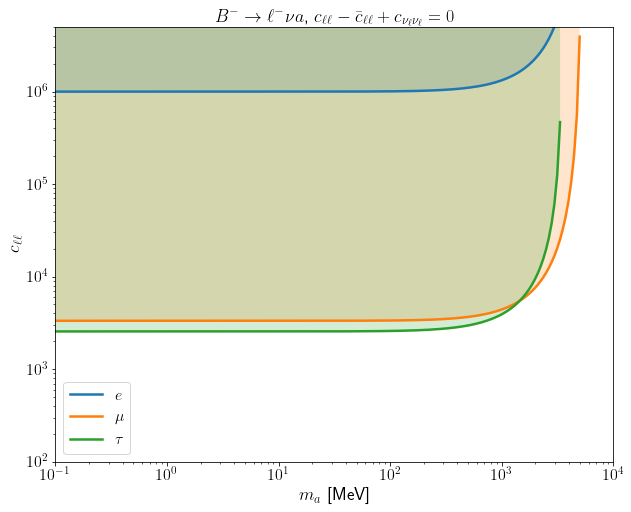

In [173]:
plt.figure(figsize=(10, 8))
plt.plot(ma, bound_Be_gl/m_ell*fa, label=r"$e$", lw=2.5)
plt.plot(ma, bound_Bmu_gl/m_mu*fa, label=r"$\mu$", lw=2.5)
plt.plot(ma, bound_Btau_gl/m_tau*fa, label=r"$\tau$", lw=2.5)
plt.fill_between(ma, bound_Be_gl/m_ell*fa, 5e6, alpha=0.2)
plt.fill_between(ma, bound_Bmu_gl/m_mu*fa, 5e6, alpha=0.2)
plt.fill_between(ma, bound_Btau_gl/m_tau*fa, 5e6, alpha=0.2)
ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')
plt.xlim(0.1, 1e4)
plt.xlabel(r'$m_a$ [MeV]', fontsize=18)
plt.ylabel(r'$c_{\ell\ell}$', fontsize=18)
plt.title(r'$B^-\to \ell^- \nu a$, $c_{\ell\ell} - \bar{c}_{\ell\ell} + c_{\nu_\ell\nu_\ell} = 0$', fontsize=18)
plt.legend(fontsize=16)
plt.xlim(0.1, 1e4)
plt.ylim(1e2, 5e6)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.savefig('limcl.png')

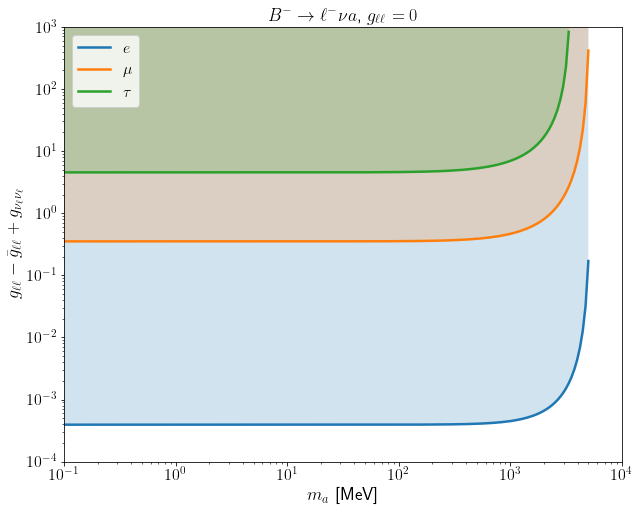

In [172]:
plt.figure(figsize=(10, 8))
plt.plot(ma, bound_Be_gW, label=r"$e$", lw=2.5)
plt.plot(ma, bound_Bmu_gl, label=r"$\mu$", lw=2.5)
plt.plot(ma, bound_Btau_gl, label=r"$\tau$", lw=2.5)
plt.fill_between(ma, bound_Be_gW, 1e3, alpha=0.2)
plt.fill_between(ma, bound_Bmu_gl, 1e3, alpha=0.2)
plt.fill_between(ma, bound_Btau_gl, 1e3, alpha=0.2)
ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')
plt.xlim(0.1, 1e4)
plt.ylim(1e-4, 1e3)
plt.xlabel(r'$m_a$ [MeV]', fontsize=18)
plt.ylabel(r'$g_{\ell\ell} - \bar{g}_{\ell\ell} + g_{\nu_\ell\nu_\ell}$', fontsize=18)
plt.title(r'$B^-\to \ell^- \nu a$, $g_{\ell\ell} = 0$', fontsize=18)
plt.legend(fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.savefig('limgW.png')

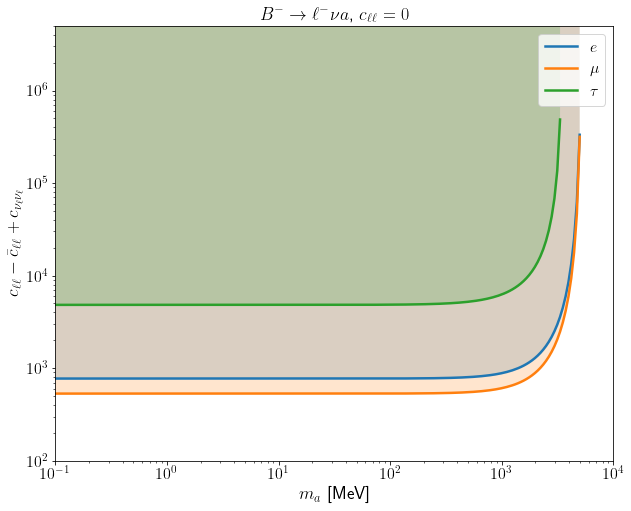

In [170]:
plt.figure(figsize=(10, 8))
plt.plot(ma, bound_Be_gW/m_ell*fa, label=r"$e$", lw=2.5)
plt.plot(ma, bound_Bmu_gW/m_mu*fa, label=r"$\mu$", lw=2.5)
plt.plot(ma, bound_Btau_gW/m_tau*fa, label=r"$\tau$", lw=2.5)
plt.fill_between(ma, bound_Be_gW/m_ell*fa, 5e6, alpha=0.2)
plt.fill_between(ma, bound_Bmu_gW/m_mu*fa, 5e6, alpha=0.2)
plt.fill_between(ma, bound_Btau_gW/m_tau*fa, 5e6, alpha=0.2)
ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')
plt.xlabel(r'$m_a$ [MeV]', fontsize=18)
plt.ylabel(r'$c_{\ell\ell} - \bar{c}_{\ell\ell} + c_{\nu_\ell\nu_\ell}$', fontsize=18)
plt.title(r'$B^-\to \ell^- \nu a$, $c_{\ell\ell} = 0$', fontsize=18)
plt.legend(fontsize=16)
plt.xlim(0.1, 1e4)
plt.ylim(1e2, 5e6)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.savefig('limcW.png')

In [1]:
gl, gw = np.meshgrid(10**np.linspace(-1, 2, 100), 10**np.linspace(-4, 3, 100))

lim_Be_3GeV = np.zeros((100,100))
lim_Bmu_3GeV = np.zeros((100,100))
lim_Btau_3GeV = np.zeros((100,100))

lim_Be_1GeV = np.zeros((100,100))
lim_Bmu_1GeV = np.zeros((100,100))
lim_Btau_1GeV = np.zeros((100,100))

lim_Be_1MeV = np.zeros((100,100))
lim_Bmu_1MeV = np.zeros((100,100))
lim_Btau_1MeV = np.zeros((100,100))

cl, cw = np.meshgrid(10**np.linspace(1.5, 7, 100), 10**np.linspace(1, 6, 100))

lim_Be_3GeVc = np.zeros((100,100))
lim_Bmu_3GeVc = np.zeros((100,100))
lim_Btau_3GeVc = np.zeros((100,100))

lim_Be_1GeVc = np.zeros((100,100))
lim_Bmu_1GeVc = np.zeros((100,100))
lim_Btau_1GeVc = np.zeros((100,100))

lim_Be_1MeVc = np.zeros((100,100))
lim_Bmu_1MeVc = np.zeros((100,100))
lim_Btau_1MeVc = np.zeros((100,100))



lim_Be_3GeVp = np.zeros((100,100))
lim_Bmu_3GeVp = np.zeros((100,100))
lim_Btau_3GeVp = np.zeros((100,100))

lim_Be_1GeVp = np.zeros((100,100))
lim_Bmu_1GeVp = np.zeros((100,100))
lim_Btau_1GeVp = np.zeros((100,100))

lim_Be_1MeVp = np.zeros((100,100))
lim_Bmu_1MeVp = np.zeros((100,100))
lim_Btau_1MeVp = np.zeros((100,100))

NameError: name 'np' is not defined

In [81]:
for i in range(100):
    for j in range(100):
        m = 3000
        lim_Be_3GeV[i,j] = (quad(lambda t: dGamma(t, m, m_ell, m_B, gl[i,j], gw[i,j]), (m+m_ell)**2, m_B**2)[0]/(4*np.pi**2*m_ell**2*(1-m_ell**2/m_B**2)**2) + 1) * BR_SM_Be - BR_exp_Be
        lim_Bmu_3GeV[i,j] = (quad(lambda t: dGamma(t, m, m_mu, m_B, gl[i,j], gw[i,j]), (m+m_mu)**2, m_B**2)[0]/(4*np.pi**2*m_mu**2*(1-m_mu**2/m_B**2)**2) + 1) * BR_SM_Bmu - BR_exp_Bmu
        lim_Btau_3GeV[i,j] = (quad(lambda t: dGamma(t, m, m_tau, m_B, gl[i,j], gw[i,j]), (m+m_tau)**2, m_B**2)[0]/(4*np.pi**2*m_tau**2*(1-m_tau**2/m_B**2)**2) + 1) * BR_SM_Btau - BR_exp_Btau
        m = 1000
        lim_Be_1GeV[i,j] = (quad(lambda t: dGamma(t, m, m_ell, m_B, gl[i,j], gw[i,j]), (m+m_ell)**2, m_B**2)[0]/(4*np.pi**2*m_ell**2*(1-m_ell**2/m_B**2)**2) + 1) * BR_SM_Be - BR_exp_Be
        lim_Bmu_1GeV[i,j] = (quad(lambda t: dGamma(t, m, m_mu, m_B, gl[i,j], gw[i,j]), (m+m_mu)**2, m_B**2)[0]/(4*np.pi**2*m_mu**2*(1-m_mu**2/m_B**2)**2) + 1) * BR_SM_Bmu - BR_exp_Bmu
        lim_Btau_1GeV[i,j] = (quad(lambda t: dGamma(t, m, m_tau, m_B, gl[i,j], gw[i,j]), (m+m_tau)**2, m_B**2)[0]/(4*np.pi**2*m_tau**2*(1-m_tau**2/m_B**2)**2) + 1) * BR_SM_Btau - BR_exp_Btau
        m = 1
        lim_Be_1MeV[i,j] = (quad(lambda t: dGamma(t, m, m_ell, m_B, gl[i,j], gw[i,j]), (m+m_ell)**2, m_B**2)[0]/(4*np.pi**2*m_ell**2*(1-m_ell**2/m_B**2)**2) + 1) * BR_SM_Be - BR_exp_Be
        lim_Bmu_1MeV[i,j] = (quad(lambda t: dGamma(t, m, m_mu, m_B, gl[i,j], gw[i,j]), (m+m_mu)**2, m_B**2)[0]/(4*np.pi**2*m_mu**2*(1-m_mu**2/m_B**2)**2) + 1) * BR_SM_Bmu - BR_exp_Bmu
        lim_Btau_1MeV[i,j] = (quad(lambda t: dGamma(t, m, m_tau, m_B, gl[i,j], gw[i,j]), (m+m_tau)**2, m_B**2)[0]/(4*np.pi**2*m_tau**2*(1-m_tau**2/m_B**2)**2) + 1) * BR_SM_Btau - BR_exp_Btau

In [97]:
for i in range(100):
    for j in range(100):
        m = 3000
        lim_Be_3GeVc[i,j] = (quad(lambda t: dGamma(t, m, m_ell, m_B, cl[i,j]*m_ell/fa, cw[i,j]*m_ell/fa), (m+m_ell)**2, m_B**2)[0]/(4*np.pi**2*m_ell**2*(1-m_ell**2/m_B**2)**2) + 1) * BR_SM_Be - BR_exp_Be
        lim_Bmu_3GeVc[i,j] = (quad(lambda t: dGamma(t, m, m_mu, m_B, cl[i,j]*m_mu/fa, cw[i,j]*m_mu/fa), (m+m_mu)**2, m_B**2)[0]/(4*np.pi**2*m_mu**2*(1-m_mu**2/m_B**2)**2) + 1) * BR_SM_Bmu - BR_exp_Bmu
        lim_Btau_3GeVc[i,j] = (quad(lambda t: dGamma(t, m, m_tau, m_B, cl[i,j]*m_tau/fa, cw[i,j]*m_tau/fa), (m+m_tau)**2, m_B**2)[0]/(4*np.pi**2*m_tau**2*(1-m_tau**2/m_B**2)**2) + 1) * BR_SM_Btau - BR_exp_Btau
        m = 1000
        lim_Be_1GeVc[i,j] = (quad(lambda t: dGamma(t, m, m_ell, m_B, cl[i,j]*m_ell/fa, cw[i,j]*m_ell/fa), (m+m_ell)**2, m_B**2)[0]/(4*np.pi**2*m_ell**2*(1-m_ell**2/m_B**2)**2) + 1) * BR_SM_Be - BR_exp_Be
        lim_Bmu_1GeVc[i,j] = (quad(lambda t: dGamma(t, m, m_mu, m_B, cl[i,j]*m_mu/fa, cw[i,j]*m_mu/fa), (m+m_mu)**2, m_B**2)[0]/(4*np.pi**2*m_mu**2*(1-m_mu**2/m_B**2)**2) + 1) * BR_SM_Bmu - BR_exp_Bmu
        lim_Btau_1GeVc[i,j] = (quad(lambda t: dGamma(t, m, m_tau, m_B, cl[i,j]*m_tau/fa, cw[i,j]*m_tau/fa), (m+m_tau)**2, m_B**2)[0]/(4*np.pi**2*m_tau**2*(1-m_tau**2/m_B**2)**2) + 1) * BR_SM_Btau - BR_exp_Btau
        m = 1
        lim_Be_1MeVc[i,j] = (quad(lambda t: dGamma(t, m, m_ell, m_B, cl[i,j]*m_ell/fa, cw[i,j]*m_ell/fa), (m+m_ell)**2, m_B**2)[0]/(4*np.pi**2*m_ell**2*(1-m_ell**2/m_B**2)**2) + 1) * BR_SM_Be - BR_exp_Be
        lim_Bmu_1MeVc[i,j] = (quad(lambda t: dGamma(t, m, m_mu, m_B, cl[i,j]*m_mu/fa, cw[i,j]*m_mu/fa), (m+m_mu)**2, m_B**2)[0]/(4*np.pi**2*m_mu**2*(1-m_mu**2/m_B**2)**2) + 1) * BR_SM_Bmu - BR_exp_Bmu
        lim_Btau_1MeVc[i,j] = (quad(lambda t: dGamma(t, m, m_tau, m_B, cl[i,j]*m_tau/fa, cw[i,j]*m_tau/fa), (m+m_tau)**2, m_B**2)[0]/(4*np.pi**2*m_tau**2*(1-m_tau**2/m_B**2)**2) + 1) * BR_SM_Btau - BR_exp_Btau

In [ ]:
for i in range(100):
    for j in range(100):
        m = 3000
        lim_Be_3GeVp[i,j] = (quad(lambda t: dGamma(t, m, m_ell, m_B, cl[i,j]*m_ell/fa, cw[i,j]*m_ell/fa), (m+m_ell)**2, m_B**2)[0]/(4*np.pi**2*m_ell**2*(1-m_ell**2/m_B**2)**2) + 1) * BR_SM_Be - BR_exp_Be
        lim_Bmu_3GeVp[i,j] = (quad(lambda t: dGamma(t, m, m_mu, m_B, cl[i,j]*m_mu/fa, cw[i,j]*m_mu/fa), (m+m_mu)**2, m_B**2)[0]/(4*np.pi**2*m_mu**2*(1-m_mu**2/m_B**2)**2) + 1) * BR_SM_Bmu - BR_exp_Bmu
        lim_Btau_3GeVp[i,j] = (quad(lambda t: dGamma(t, m, m_tau, m_B, cl[i,j]*m_tau/fa, cw[i,j]*m_tau/fa), (m+m_tau)**2, m_B**2)[0]/(4*np.pi**2*m_tau**2*(1-m_tau**2/m_B**2)**2) + 1) * BR_SM_Btau - BR_exp_Btau
        m = 1000
        lim_Be_1GeVp[i,j] = (quad(lambda t: dGamma(t, m, m_ell, m_B, cl[i,j]*m_ell/fa, cw[i,j]*m_ell/fa), (m+m_ell)**2, m_B**2)[0]/(4*np.pi**2*m_ell**2*(1-m_ell**2/m_B**2)**2) + 1) * BR_SM_Be - BR_exp_Be
        lim_Bmu_1GeVp[i,j] = (quad(lambda t: dGamma(t, m, m_mu, m_B, cl[i,j]*m_mu/fa, cw[i,j]*m_mu/fa), (m+m_mu)**2, m_B**2)[0]/(4*np.pi**2*m_mu**2*(1-m_mu**2/m_B**2)**2) + 1) * BR_SM_Bmu - BR_exp_Bmu
        lim_Btau_1GeV[i,j] = (quad(lambda t: dGamma(t, m, m_tau, m_B, cl[i,j]*m_tau/fa, cw[i,j]*m_tau/fa), (m+m_tau)**2, m_B**2)[0]/(4*np.pi**2*m_tau**2*(1-m_tau**2/m_B**2)**2) + 1) * BR_SM_Btau - BR_exp_Btau
        m = 1
        lim_Be_1MeVc[i,j] = (quad(lambda t: dGamma(t, m, m_ell, m_B, cl[i,j]*m_ell/fa, cw[i,j]*m_ell/fa), (m+m_ell)**2, m_B**2)[0]/(4*np.pi**2*m_ell**2*(1-m_ell**2/m_B**2)**2) + 1) * BR_SM_Be - BR_exp_Be
        lim_Bmu_1MeVc[i,j] = (quad(lambda t: dGamma(t, m, m_mu, m_B, cl[i,j]*m_mu/fa, cw[i,j]*m_mu/fa), (m+m_mu)**2, m_B**2)[0]/(4*np.pi**2*m_mu**2*(1-m_mu**2/m_B**2)**2) + 1) * BR_SM_Bmu - BR_exp_Bmu
        lim_Btau_1MeVc[i,j] = (quad(lambda t: dGamma(t, m, m_tau, m_B, cl[i,j]*m_tau/fa, cw[i,j]*m_tau/fa), (m+m_tau)**2, m_B**2)[0]/(4*np.pi**2*m_tau**2*(1-m_tau**2/m_B**2)**2) + 1) * BR_SM_Btau - BR_exp_Btau

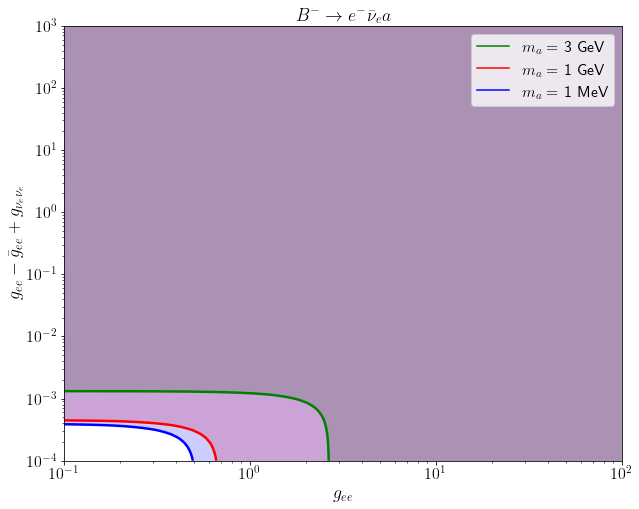

In [169]:
plt.figure(figsize=(10, 8))
plt.contour(gl, gw, lim_Be_3GeV, levels=[0,], colors='g', linewidths=2.5)
plt.contour(gl, gw, lim_Be_1GeV, levels=[0,], colors='r', linewidths=2.5)
plt.contour(gl, gw, lim_Be_1MeV, levels=[0,], colors='b', linewidths=2.5)
plt.contourf(gl, gw, lim_Be_3GeV, levels=[np.min(lim_Be_3GeV), 0, np.max(lim_Be_3GeV)], colors=['w', 'g'], alpha=0.2)
plt.contourf(gl, gw, lim_Be_1GeV, levels=[np.min(lim_Be_1GeV), 0, np.max(lim_Be_1GeV)], colors=['w', 'r'], alpha=0.2)
plt.contourf(gl, gw, lim_Be_1MeV, levels=[np.min(lim_Be_1MeV), 0, np.max(lim_Be_1MeV)], colors=['w', 'b'], alpha=0.2)
ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')
plt.xlabel(r'$g_{ee}$', fontsize=18)
plt.ylabel(r'$g_{ee} - \bar{g}_{ee} + g_{\nu_e\nu_e}$', fontsize=18)
plt.title(r"$B^-\to e^- \bar{\nu}_e a$", fontsize=18)

handles = [plt.Line2D([0], [0], c='g', label='$m_a =$ 3 GeV'), plt.Line2D([0], [0], c='r', label='$m_a =$ 1 GeV'), plt.Line2D([0], [0], c='b', label='$m_a =$ 1 MeV')]
plt.legend(handles=handles, fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.savefig('gegw.png')

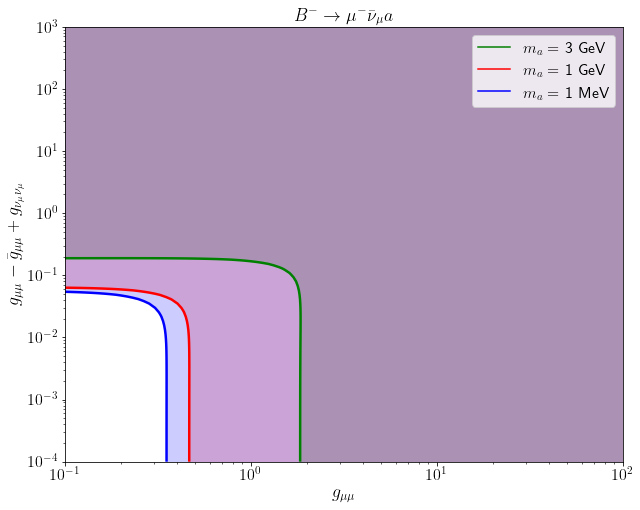

In [168]:
plt.figure(figsize=(10, 8))
plt.contour(gl, gw, lim_Bmu_3GeV, levels=[0,], colors='g', linewidths=2.5)
plt.contour(gl, gw, lim_Bmu_1GeV, levels=[0,], colors='r', linewidths=2.5)
plt.contour(gl, gw, lim_Bmu_1MeV, levels=[0,], colors='b', linewidths=2.5)
plt.contourf(gl, gw, lim_Bmu_3GeV, levels=[np.min(lim_Bmu_3GeV), 0, np.max(lim_Bmu_3GeV)], colors=['w', 'g'], alpha=0.2)
plt.contourf(gl, gw, lim_Bmu_1GeV, levels=[np.min(lim_Bmu_1GeV), 0, np.max(lim_Bmu_1GeV)], colors=['w', 'r'], alpha=0.2)
plt.contourf(gl, gw, lim_Bmu_1MeV, levels=[np.min(lim_Bmu_1MeV), 0, np.max(lim_Bmu_1MeV)], colors=['w', 'b'], alpha=0.2)
ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')
plt.xlabel(r'$g_{\mu\mu}$', fontsize=18)
plt.ylabel(r'$g_{\mu\mu} - \bar{g}_{\mu\mu} + g_{\nu_\mu\nu_\mu}$', fontsize=18)
plt.title(r"$B^-\to \mu^- \bar{\nu}_\mu a$", fontsize=18)
handles = [plt.Line2D([0], [0], c='g', label='$m_a =$ 3 GeV'), plt.Line2D([0], [0], c='r', label='$m_a =$ 1 GeV'), plt.Line2D([0], [0], c='b', label='$m_a =$ 1 MeV')]
plt.legend(handles=handles, fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.savefig('gmugw.png')

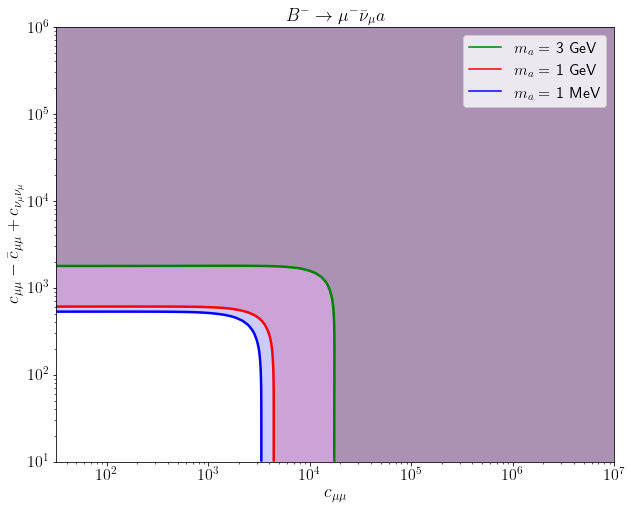

In [167]:
plt.figure(figsize=(10, 8))
plt.contour(cl, cw, lim_Bmu_3GeVc, levels=[0,], colors='g', linewidths=2.5)
plt.contour(cl, cw, lim_Bmu_1GeVc, levels=[0,], colors='r', linewidths=2.5)
plt.contour(cl, cw, lim_Bmu_1MeVc, levels=[0,], colors='b', linewidths=2.5)
plt.contourf(cl, cw, lim_Bmu_3GeVc, levels=[np.min(lim_Bmu_3GeVc), 0, np.max(lim_Bmu_3GeVc)], colors=['w', 'g'], alpha=0.2)
plt.contourf(cl, cw, lim_Bmu_1GeVc, levels=[np.min(lim_Bmu_1GeVc), 0, np.max(lim_Bmu_1GeVc)], colors=['w', 'r'], alpha=0.2)
plt.contourf(cl, cw, lim_Bmu_1MeVc, levels=[np.min(lim_Bmu_1MeVc), 0, np.max(lim_Bmu_1MeVc)], colors=['w', 'b'], alpha=0.2)
ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')
plt.xlabel(r'$c_{\mu\mu}$', fontsize=18)
plt.ylabel(r'$c_{\mu\mu} - \bar{c}_{\mu\mu} + c_{\nu_\mu\nu_\mu}$', fontsize=18)
plt.title(r"$B^-\to \mu^- \bar{\nu}_\mu a$", fontsize=18)
handles = [plt.Line2D([0], [0], c='g', label='$m_a =$ 3 GeV'), plt.Line2D([0], [0], c='r', label='$m_a =$ 1 GeV'), plt.Line2D([0], [0], c='b', label='$m_a =$ 1 MeV')]
plt.legend(handles=handles, fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.savefig('cmucw.png')

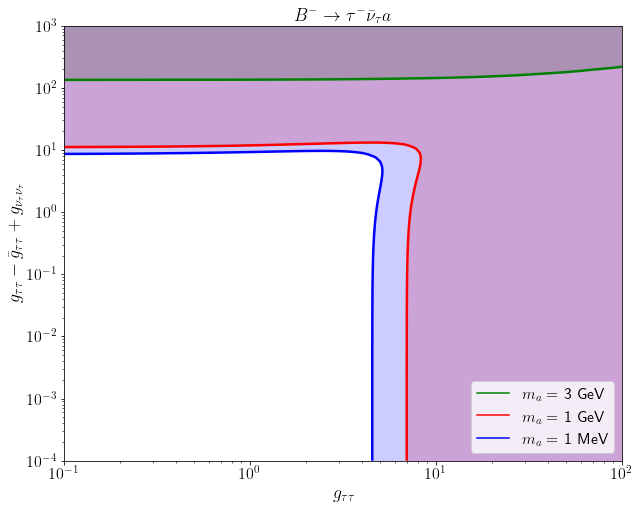

In [166]:
plt.figure(figsize=(10, 8))
plt.contour(gl, gw, lim_Btau_3GeV, levels=[0,], colors='g', linewidths=2.5)
plt.contour(gl, gw, lim_Btau_1GeV, levels=[0,], colors='r', linewidths=2.5)
plt.contour(gl, gw, lim_Btau_1MeV, levels=[0,], colors='b', linewidths=2.5)
plt.contourf(gl, gw, lim_Btau_3GeV, levels=[np.min(lim_Btau_3GeV), 0, np.max(lim_Btau_3GeV)], colors=['w', 'g'], alpha=0.2)
plt.contourf(gl, gw, lim_Btau_1GeV, levels=[np.min(lim_Btau_1GeV), 0, np.max(lim_Btau_1GeV)], colors=['w', 'r'], alpha=0.2)
plt.contourf(gl, gw, lim_Btau_1MeV, levels=[np.min(lim_Btau_1MeV), 0, np.max(lim_Btau_1MeV)], colors=['w', 'b'], alpha=0.2)
ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')
plt.xlabel(r'$g_{\tau\tau}$', fontsize=18)
plt.ylabel(r'$g_{\tau\tau} - \bar{g}_{\tau\tau} + g_{\nu_\tau\nu_\tau}$', fontsize=18)
plt.title(r"$B^-\to \tau^- \bar{\nu}_\tau a$", fontsize=18)
handles = [plt.Line2D([0], [0], c='g', label='$m_a =$ 3 GeV'), plt.Line2D([0], [0], c='r', label='$m_a =$ 1 GeV'), plt.Line2D([0], [0], c='b', label='$m_a =$ 1 MeV')]
plt.legend(handles=handles, fontsize=16, loc='lower right')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.savefig('gtaugw.png')

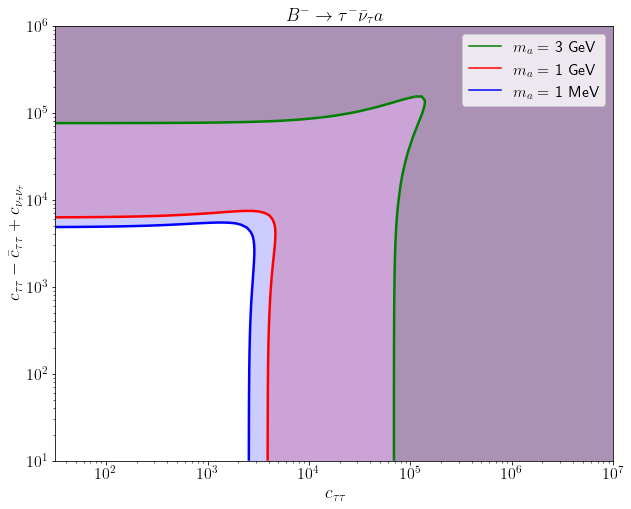

In [165]:
plt.figure(figsize=(10, 8))
plt.contour(cl, cw, lim_Btau_3GeVc, levels=[0,], colors='g', linewidths=2.5)
plt.contour(cl, cw, lim_Btau_1GeVc, levels=[0,], colors='r', linewidths=2.5)
plt.contour(cl, cw, lim_Btau_1MeVc, levels=[0,], colors='b', linewidths=2.5)
ax = plt.gca()
plt.contourf(cl, cw, lim_Btau_3GeVc, levels=[np.min(lim_Btau_3GeVc), 0, np.max(lim_Btau_3GeVc)], colors=['w', 'g'], alpha=0.2)
plt.contourf(cl, cw, lim_Btau_1GeVc, levels=[np.min(lim_Btau_1GeVc), 0, np.max(lim_Btau_1GeVc)], colors=['w', 'r'], alpha=0.2)
plt.contourf(cl, cw, lim_Btau_1MeVc, levels=[np.min(lim_Btau_1MeVc), 0, np.max(lim_Btau_1MeVc)], colors=['w', 'b'], alpha=0.2)
ax.set_xscale('log')
ax.set_yscale('log')
plt.xlabel(r'$c_{\tau\tau}$', fontsize=18)
plt.ylabel(r'$c_{\tau\tau} - \bar{c}_{\tau\tau} + c_{\nu_\tau\nu_\tau}$', fontsize=18)
plt.title(r"$B^-\to \tau^- \bar{\nu}_\tau a$", fontsize=18)
handles = [plt.Line2D([0], [0], c='g', label='$m_a =$ 3 GeV'), plt.Line2D([0], [0], c='r', label='$m_a =$ 1 GeV'), plt.Line2D([0], [0], c='b', label='$m_a =$ 1 MeV')]
plt.legend(handles=handles, fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.savefig('ctaucw.png')

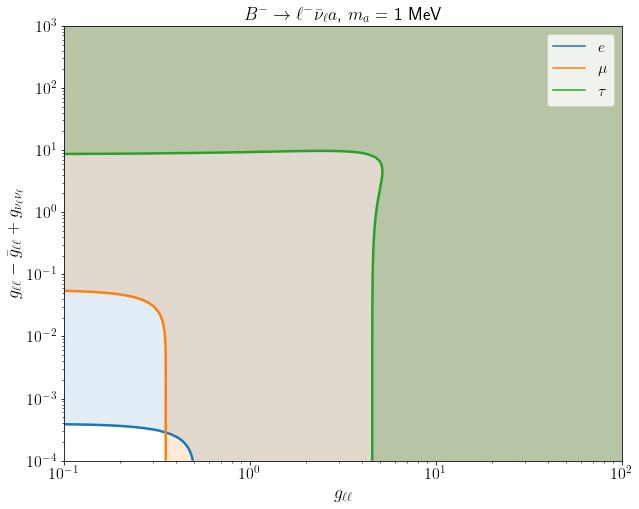

In [164]:
plt.figure(figsize=(10, 8))
plt.contour(gl, gw, lim_Be_1MeV, levels=[0,], colors='tab:blue', linewidths=2.5)
plt.contour(gl, gw, lim_Bmu_1MeV, levels=[0,], colors='tab:orange', linewidths=2.5)
plt.contour(gl, gw, lim_Btau_1MeV, levels=[0,], colors='tab:green', linewidths=2.5)
plt.contourf(gl, gw, lim_Be_1MeV, levels=[np.min(lim_Be_1MeV), 0, np.max(lim_Be_1MeV)], colors=['w', 'tab:blue'], alpha=0.2)
plt.contourf(gl, gw, lim_Bmu_1MeV, levels=[np.min(lim_Bmu_1MeV), 0, np.max(lim_Bmu_1MeV)], colors=['w', 'tab:orange'], alpha=0.2)
plt.contourf(gl, gw, lim_Btau_1MeV, levels=[np.min(lim_Btau_1MeV), 0, np.max(lim_Btau_1MeV)], colors=['w', 'tab:green'], alpha=0.2)
ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')
plt.xlabel(r'$g_{\ell\ell}$', fontsize=18)
plt.ylabel(r'$g_{\ell\ell} - \bar{g}_{\ell\ell} + g_{\nu_\ell\nu_\ell}$', fontsize=18)
plt.title(r"$B^-\to \ell^- \bar{\nu}_\ell a$, $m_a = $ 1 MeV", fontsize=18)
handles = [plt.Line2D([0], [0], c='tab:blue', label='$e$'), plt.Line2D([0], [0], c='tab:orange', label='$\mu$'), plt.Line2D([0], [0], c='tab:green', label=r'$\tau$')]
plt.legend(handles=handles, fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.savefig('lim_g_1MeV.png')

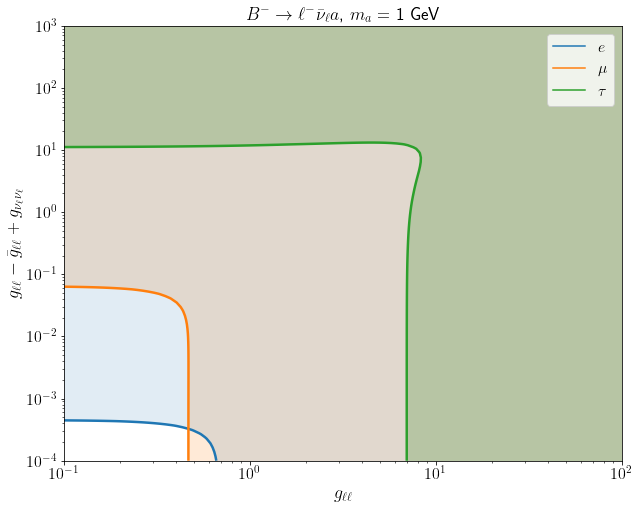

In [163]:
plt.figure(figsize=(10, 8))
plt.contour(gl, gw, lim_Be_1GeV, levels=[0,], colors='tab:blue', linewidths=2.5)
plt.contour(gl, gw, lim_Bmu_1GeV, levels=[0,], colors='tab:orange', linewidths=2.5)
plt.contour(gl, gw, lim_Btau_1GeV, levels=[0,], colors='tab:green', linewidths=2.5)
plt.contourf(gl, gw, lim_Be_1GeV, levels=[np.min(lim_Be_1GeV), 0, np.max(lim_Be_1GeV)], colors=['w', 'tab:blue'], alpha=0.2)
plt.contourf(gl, gw, lim_Bmu_1GeV, levels=[np.min(lim_Bmu_1GeV), 0, np.max(lim_Bmu_1GeV)], colors=['w', 'tab:orange'], alpha=0.2)
plt.contourf(gl, gw, lim_Btau_1GeV, levels=[np.min(lim_Btau_1GeV), 0, np.max(lim_Btau_1GeV)], colors=['w', 'tab:green'], alpha=0.2)
ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')
plt.xlabel(r'$g_{\ell\ell}$', fontsize=18)
plt.ylabel(r'$g_{\ell\ell} - \bar{g}_{\ell\ell} + g_{\nu_\ell\nu_\ell}$', fontsize=18)
plt.title(r"$B^-\to \ell^- \bar{\nu}_\ell a$, $m_a = $ 1 GeV", fontsize=18)
handles = [plt.Line2D([0], [0], c='tab:blue', label='$e$'), plt.Line2D([0], [0], c='tab:orange', label='$\mu$'), plt.Line2D([0], [0], c='tab:green', label=r'$\tau$')]
plt.legend(handles=handles, fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.savefig('lim_g_1GeV.png')

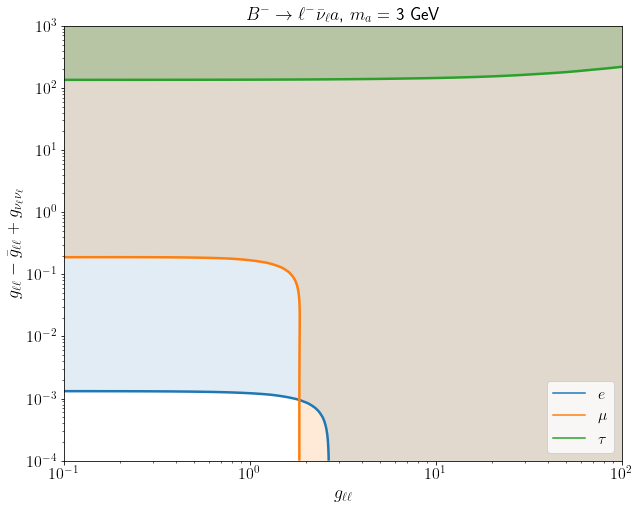

In [162]:
plt.figure(figsize=(10, 8))
plt.contour(gl, gw, lim_Be_3GeV, levels=[0,], colors='tab:blue', linewidths=2.5)
plt.contour(gl, gw, lim_Bmu_3GeV, levels=[0,], colors='tab:orange', linewidths=2.5)
plt.contour(gl, gw, lim_Btau_3GeV, levels=[0,], colors='tab:green', linewidths=2.5)
plt.contourf(gl, gw, lim_Be_3GeV, levels=[np.min(lim_Be_3GeV), 0, np.max(lim_Be_3GeV)], colors=['w', 'tab:blue'], alpha=0.2)
plt.contourf(gl, gw, lim_Bmu_3GeV, levels=[np.min(lim_Bmu_3GeV), 0, np.max(lim_Bmu_3GeV)], colors=['w', 'tab:orange'], alpha=0.2)
plt.contourf(gl, gw, lim_Btau_3GeV, levels=[np.min(lim_Btau_3GeV), 0, np.max(lim_Btau_3GeV)], colors=['w', 'tab:green'], alpha=0.2)
ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')
plt.xlabel(r'$g_{\ell\ell}$', fontsize=18)
plt.ylabel(r'$g_{\ell\ell} - \bar{g}_{\ell\ell} + g_{\nu_\ell\nu_\ell}$', fontsize=18)
plt.title(r"$B^-\to \ell^- \bar{\nu}_\ell a$, $m_a = $ 3 GeV", fontsize=18)
handles = [plt.Line2D([0], [0], c='tab:blue', label='$e$'), plt.Line2D([0], [0], c='tab:orange', label='$\mu$'), plt.Line2D([0], [0], c='tab:green', label=r'$\tau$')]
plt.legend(handles=handles, fontsize=16, loc='lower right')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.savefig('lim_g_3GeV.png')

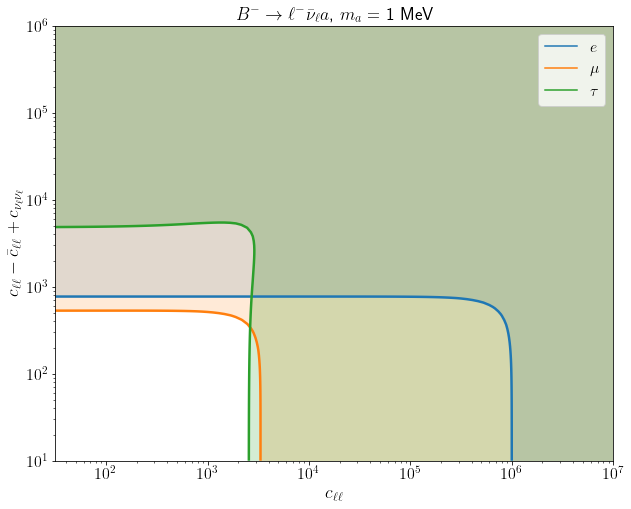

In [161]:
plt.figure(figsize=(10, 8))
plt.contour(cl, cw, lim_Be_1MeVc, levels=[0,], colors='tab:blue', linewidths=2.5)
plt.contour(cl, cw, lim_Bmu_1MeVc, levels=[0,], colors='tab:orange', linewidths=2.5)
plt.contour(cl, cw, lim_Btau_1MeVc, levels=[0,], colors='tab:green', linewidths=2.5)
plt.contourf(cl, cw, lim_Be_1MeVc, levels=[np.min(lim_Be_1MeVc), 0, np.max(lim_Be_1MeVc)], colors=['w', 'tab:blue'], alpha=0.2)
plt.contourf(cl, cw, lim_Bmu_1MeVc, levels=[np.min(lim_Bmu_1MeVc), 0, np.max(lim_Bmu_1MeVc)], colors=['w', 'tab:orange'], alpha=0.2)
plt.contourf(cl, cw, lim_Btau_1MeVc, levels=[np.min(lim_Btau_1MeVc), 0, np.max(lim_Btau_1MeVc)], colors=['w', 'tab:green'], alpha=0.2)
ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')
plt.xlabel(r'$c_{\ell\ell}$', fontsize=18)
plt.ylabel(r'$c_{\ell\ell} - \bar{c}_{\ell\ell} + c_{\nu_\ell\nu_\ell}$', fontsize=18)
plt.title(r"$B^-\to \ell^- \bar{\nu}_\ell a$, $m_a = $ 1 MeV", fontsize=18)
handles = [plt.Line2D([0], [0], c='tab:blue', label='$e$'), plt.Line2D([0], [0], c='tab:orange', label='$\mu$'), plt.Line2D([0], [0], c='tab:green', label=r'$\tau$')]
plt.legend(handles=handles, fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.savefig('lim_c_1MeV.png')

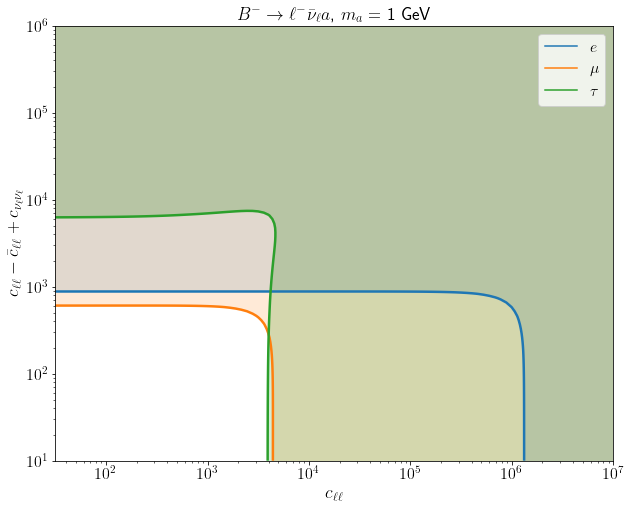

In [160]:
plt.figure(figsize=(10, 8))
plt.contour(cl, cw, lim_Be_1GeVc, levels=[0,], colors='tab:blue', linewidths=2.5)
plt.contour(cl, cw, lim_Bmu_1GeVc, levels=[0,], colors='tab:orange', linewidths=2.5)
plt.contour(cl, cw, lim_Btau_1GeVc, levels=[0,], colors='tab:green', linewidths=2.5)
plt.contourf(cl, cw, lim_Be_1GeVc, levels=[np.min(lim_Be_1GeVc), 0, np.max(lim_Be_1GeVc)], colors=['w', 'tab:blue'], alpha=0.2)
plt.contourf(cl, cw, lim_Bmu_1GeVc, levels=[np.min(lim_Bmu_1GeVc), 0, np.max(lim_Bmu_1GeVc)], colors=['w', 'tab:orange'], alpha=0.2)
plt.contourf(cl, cw, lim_Btau_1GeVc, levels=[np.min(lim_Btau_1GeVc), 0, np.max(lim_Btau_1GeVc)], colors=['w', 'tab:green'], alpha=0.2)
ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')
plt.xlabel(r'$c_{\ell\ell}$', fontsize=18)
plt.ylabel(r'$c_{\ell\ell} - \bar{c}_{\ell\ell} + c_{\nu_\ell\nu_\ell}$', fontsize=18)
plt.title(r"$B^-\to \ell^- \bar{\nu}_\ell a$, $m_a = $ 1 GeV", fontsize=18)
handles = [plt.Line2D([0], [0], c='tab:blue', label='$e$'), plt.Line2D([0], [0], c='tab:orange', label='$\mu$'), plt.Line2D([0], [0], c='tab:green', label=r'$\tau$')]
plt.legend(handles=handles, fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.savefig('lim_c_1GeV.png')

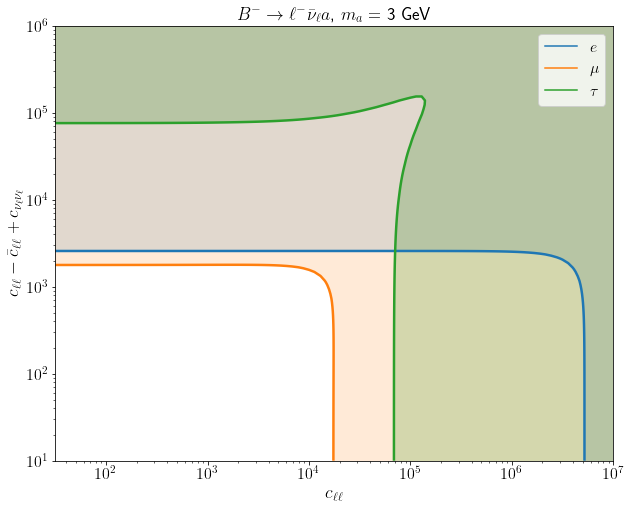

In [159]:
plt.figure(figsize=(10, 8))
plt.contour(cl, cw, lim_Be_3GeVc, levels=[0,], colors='tab:blue', linewidths=2.5)
plt.contour(cl, cw, lim_Bmu_3GeVc, levels=[0,], colors='tab:orange', linewidths=2.5)
plt.contour(cl, cw, lim_Btau_3GeVc, levels=[0,], colors='tab:green', linewidths=2.5)
plt.contourf(cl, cw, lim_Be_3GeVc, levels=[np.min(lim_Be_3GeVc), 0, np.max(lim_Be_3GeVc)], colors=['w', 'tab:blue'], alpha=0.2)
plt.contourf(cl, cw, lim_Bmu_3GeVc, levels=[np.min(lim_Bmu_3GeVc), 0, np.max(lim_Bmu_3GeVc)], colors=['w', 'tab:orange'], alpha=0.2)
plt.contourf(cl, cw, lim_Btau_3GeVc, levels=[np.min(lim_Btau_3GeVc), 0, np.max(lim_Btau_3GeVc)], colors=['w', 'tab:green'], alpha=0.2)
ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')
plt.xlabel(r'$c_{\ell\ell}$', fontsize=18)
plt.ylabel(r'$c_{\ell\ell} - \bar{c}_{\ell\ell} + c_{\nu_\ell\nu_\ell}$', fontsize=18)
plt.title(r"$B^-\to \ell^- \bar{\nu}_\ell a$, $m_a = $ 3 GeV", fontsize=18)
handles = [plt.Line2D([0], [0], c='tab:blue', label='$e$'), plt.Line2D([0], [0], c='tab:orange', label='$\mu$'), plt.Line2D([0], [0], c='tab:green', label=r'$\tau$')]
plt.legend(handles=handles, fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.savefig('lim_c_3GeV.png')

In [3]:
m_B-m_tau

3502.4800000000005